In [0]:
import pandas as pd
import numpy as np
import csv
import datetime as dt

Read in the data file as a csv file

In [0]:
data = pd.read_csv('moloco.csv')

In [105]:
data.head()

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G


The three columns in the data accounts for the timestamp, the user_id, country_id and the site_id

# EXPLORATORY DATA ANALYSIS

In [106]:
data.info() #we have non-null values and and all columns are object data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ts          3553 non-null   object
 1   user_id     3553 non-null   object
 2   country_id  3553 non-null   object
 3   site_id     3553 non-null   object
dtypes: object(4)
memory usage: 111.2+ KB


In [107]:
data.user_id.nunique() # there are 1916 unique users in the data

1916

# Consider only the rows with country_id = "BDV" (there are 844 such rows). For each site_id, we can compute the number of unique user_id's found in these 844 rows. Which site_id has the largest number of unique users? And what's the number?

In [108]:
data.country_id.unique() ## this method computes the unique country_ids in the data

array(['TL6', 'HVQ', 'QLT', 'BDV', 'XA7', 'NVV', 'K1R'], dtype=object)

In [0]:
new_data  = data[data['country_id'] == 'BDV']

In [110]:
new_data.groupby(['site_id'])['user_id'].nunique()

site_id
3POLC      2
5NPAU    544
N0OTG     90
Name: user_id, dtype: int64

**Answer **- site_id 5NPAU has 544 unique users

# Between 2019-02-03 00:00:00 and 2019-02-04 23:59:59, there are four users who visited a certain site more than 10 times. Find these four users & which sites they (each) visited more than 10 times. (Simply provides four triples in the form (user_id, site_id, number of visits) in the box below.)

In [0]:
data['ts'] = pd.to_datetime(data['ts'])

In [112]:
data.info() #timestamp column has been converted to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ts          3553 non-null   datetime64[ns]
 1   user_id     3553 non-null   object        
 2   country_id  3553 non-null   object        
 3   site_id     3553 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 111.2+ KB


In [0]:
time_data  = data[(data['ts'] >= '2019-02-03 00:00:00') & (data['ts'] <= '2019-02-04 23:59:59')]

In [114]:
time_data.groupby(['site_id', 'user_id'])['user_id'].count().sort_values().tail(4)

site_id  user_id
3POLC    LC3C7E     15
N0OTG    LC3C9D     17
         LC06C3     25
         LC3A59     26
Name: user_id, dtype: int64

# For each site, compute the unique number of users whose last visit (found in the original data set) was to that site. For instance, user "LC3561"'s last visit is to "N0OTG" based on timestamp data. Based on this measure, what are top three sites? (hint: site "3POLC" is ranked at 5th with 28 users whose last visit in the data set was to 3POLC; simply provide three pairs in the form (site_id, number of users).)


In [0]:
data_freq = data.groupby(['user_id'])['ts'].max().sort_values()

In [0]:
users  = data_freq.to_frame().reset_index()

In [0]:
joined  = pd.merge(data,users, on=['user_id', 'ts'], how = 'right')

In [118]:
joined.site_id.value_counts()

5NPAU    992
N0OTG    561
QGO3G    289
GVOFK     42
3POLC     28
RT9Z6      2
EUZ/Q      1
JSUUP      1
Name: site_id, dtype: int64

# For each user, determine the first site he/she visited and the last site he/she visited based on the timestamp data. Compute the number of users whose first/last visits are to the same website. What is the number?

In [0]:
first_site = data.groupby(['user_id'])['ts'].min().reset_index()

In [0]:
last_site = data.groupby(['user_id'])['ts'].max().reset_index()



In [0]:
#merge both dataframes to the original data
first_joined  = pd.merge(data,first_site, on=['user_id', 'ts'], how = 'right')
last_joined  = pd.merge(data,last_site, on=['user_id', 'ts'], how = 'right')

In [122]:
same_website  = pd.merge(first_joined,last_joined, how = 'inner')
same_website.user_id.nunique()

1261

# The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 


In [0]:
regression_data = pd.read_csv('moloco_regression.csv',header = None)

In [0]:
regression_data.columns = ['A', 'B','C'] #rename the column names

In [158]:
regression_data.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [159]:
"""This a multivariate regression problem involving two independent variables A and B to predict
  the dependent variable C"""

"""Append a column of ones to the data(bias) as the first column"""


#create an empty list for storing the X and Y values
data = []

#read the data from the csv file
with open('moloco_regression.csv') as f:
  raw  = csv.reader(f)

  for row in raw:
    ones = [1.0]
    for r in row:
      ones.append(float(r))
      #append the row to the data
    data.append(ones)
data = np.array(data)
data[:5,:] #print the first five rows


array([[  1.   ,   0.49 ,  -0.18 ,  11.5  ],
       [  1.   ,  -1.41 ,  -1.23 ,  11.8  ],
       [  1.   ,   0.943,   4.51 ,  -3.24 ],
       [  1.   ,   3.57 ,   5.07 , -23.9  ],
       [  1.   ,  -1.7  ,   6.91 , -22.1  ]])

# Perform a 80/20 train-test split

In [160]:
# Set a seed
np.random.seed(42)
# Perform an 80/20 split
# Make array of indices
all_idx = np.arange(data.shape[0])
# Randomly choose 80% subset of indices without replacement for training
training_idx = np.random.choice(all_idx, size=round(300*.8), replace=False)
# Choose remaining 20% of indices for testing
test_idx = all_idx[~np.isin(all_idx, training_idx)]
# Subset data 
training, test = data[training_idx,:], data[test_idx,:]

# Check the shape of datasets
print ('Raw data Shape: ', data.shape)
print ('Train/Test Split:', training.shape, test.shape)

# Create x and y for test and training sets
x_train = training[:,:-1]
y_train = training [:,-1]

x_test = test[:,:-1]
y_test = test[:,-1]

# Check the shape of datasets
print ('x_train, y_train, x_test, y_test:', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Raw data Shape:  (300, 4)
Train/Test Split: (240, 4) (60, 4)
x_train, y_train, x_test, y_test: (240, 3) (240,) (60, 3) (60,)


# Calculate the beta values

In [161]:
# Calculate Xt.X and Xt.y for beta = (XT . X)-1 . XT . y 
Xt = np.transpose(x_train)
XtX = np.dot(Xt,x_train)
Xty = np.dot(Xt,y_train)

# Calculate inverse of Xt.X
XtX_inv = np.linalg.inv(XtX)

# Take the dot product of XtX_inv with Xty to compute beta
beta = XtX_inv.dot(Xty)

# Print the values of computed beta
print(beta)

[-28.58050476 -10.32192908   1.34387511]


# Make Predictions

Now we have a new set of coefficients that describe the linear mappings
between x and y. Use the calculated beta values with the test datasets to calculate the predictions. Use the all features A and B and multiply it with beta.
The result will give a prediction for each row and append to a new array of predictions

In [0]:
"""Create a new empty list (y_pred) for saving predictions

  For each row of x_test, take the dot product of the row with beta to calculate 
  the prediction for that row"""

"""Append the predictions to y_pred

   Print the new set of predictions"""

# Calculate and print predictions for each row of X_test
y_pred = []
for row in x_test:
    pred = row.dot(beta)
    y_pred.append(pred)

# Evalaute the model

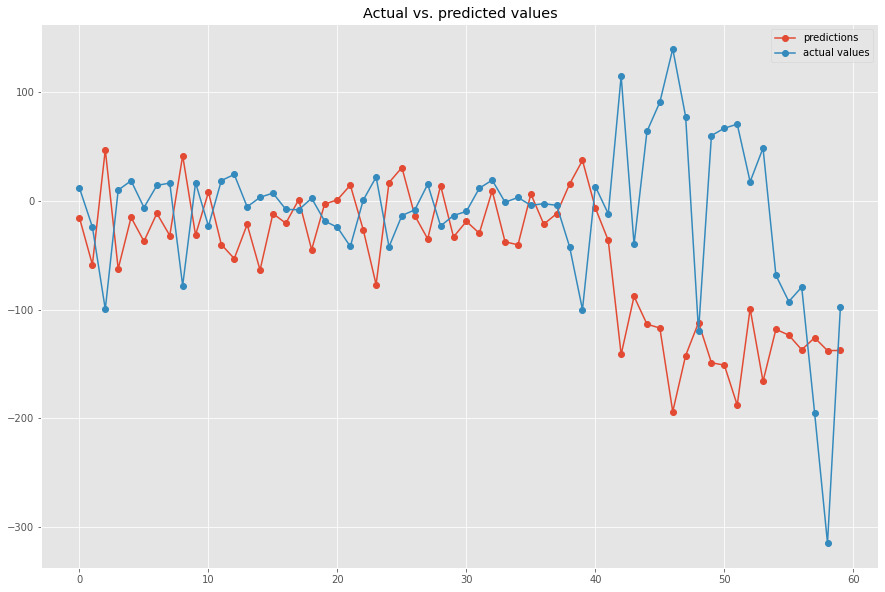

In [163]:
"""The model can now use the beta value to predict the values in C as 
   a fucntion of A and B as the input features"""

# Plot predicted and actual values as line plots
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.style.use('ggplot')

plt.plot(y_pred, linestyle='-', marker='o', label='predictions')
plt.plot(y_test, linestyle='-', marker='o', label='actual values')
plt.title('Actual vs. predicted values')
plt.legend()
plt.show()

In [164]:
# Calculate RMSE value
err = []
for pred,actual in zip(y_pred,y_test):
    sq_err = (pred - actual) ** 2
    err.append(sq_err)
mean_sq_err = np.array(err).mean()
root_mean_sq_err = np.sqrt(mean_sq_err)
root_mean_sq_err



107.00838356917066

In [165]:
#calculate the normalised_rmse
root_mean_sq_err/(y_train.max() - y_train.min())


0.010488961337891655

With normalised rmse at 0.0104 we have managed to build a decent good model using numpy and 
   no Machine learning libraries or packages